# Librerias

In [1]:
from concurrent.futures import ThreadPoolExecutor
from sklearn.decomposition import PCA
from scipy.signal import spectrogram
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from pydub import AudioSegment
import librosa.display
import numpy as np
import yt_dlp
import cv2
import os

# Prerequisitos
Descomentar la siguiente linea si hace falta alguna dependecia o existe algun error

In [2]:
#!pip install yt_dlp librosa pydub
#!conda install -c conda-forge ffmpeg

In [3]:
songsPath = 'songs'
imagesPath = 'images'

def createDirectory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

createDirectory(songsPath)
createDirectory(imagesPath)

# Descarga del dataset de canciones

In [35]:
def downloadSong(url):
    ydl_opts = {
        'format': 'bestaudio/best',
        'outtmpl': songsPath + '/%(title)s.%(ext)s',
    }
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])
    print(f"Descarga completada: {url}")

def downloadSongs():
    videoIds = [
        'KgFJQB-aiIs', 'c9QT3Vk-JoY', 'FN5oLBXiNvM', 'JLwmBfrbYR4', 'LsdSSj90fJI', 'mLznpUGX1Pw', 'CgBiPEJY32k', 'Y9SJxwMSf5k', '5Z_vieWhWqw', 'waMSgkcQkTw',
        'Zc13NAc7dvM', '7Ho86ggAVrY', 'kMNPv_HXffQ', '0hcoNykaI3k', 'c2mpXFLFZQE', 'J6gRGiZAQEw', 'US0GbUpQ9VU', 'p_mwt_V3rtQ', 'qYkpURie5cU', 'EwPmMwrAvVU',
        'RC5i3uPscz4', '6ke_WCdmigM', 'ZGjt_dXh1Lo', '0nvNEGEaEis', 'virDlRWbA-w', 'gxlB1B9emDc', 'ML8B-m6uyi4', '486vIyoz138', 'sLeNQgBKUWk', 'r6QSuXjdBVQ',
        '0oZ60NWSrJc', '0mzzv1JXK70', 'KnCWt228Kv8', '5404tYDaTfk', 'Ijkao2n_UdM', 'wz3y3Gz1Cyk', '00zZChU6Z5Y', 'iVUWj0xpb1E', 'az5AXsWVnCc', 'h3xtvooJgQg',
        'OKfM-oWa_ew', 'HBkZRS8gTdg', 'C8WE2kQwC28', 'LbN2azLxRYE', '6s7vtFJ6FCI', '4wf9TGflrXE', 'g4S3jUtqcyM', 'pRhKY1jVJwE', '1UY74Xjrx2o', 'eqwu2NpbQT8',
        '6sgq0azyjMw', '4rwZP5f59fg', 'DeBJt4B-lSI', 'D6lG94bV3JE', 'zFUHxbNvqXg', 'eRkfE1PCcLE', '0T1kBqw712A', 'JWL63A3PAnM', 'YKPE3JnxQBU', 'S1rCziOoRig', 
        'i9G6MtjOrrg', 'OtDuhf9Y9zU', 'dBwQ7TBkXtA', '8rRS6Quzq0E', 'KIC4fVmzUwI', 'HGesVfNKCbE', 'LqEELTcISfM', '1ztojDhiTNw', 'pz9O3UeM_o0', 'TCj5jdNIn1A', 
        'xWDsNex_VKA', 'ENHH9-imLe8', 'zD7KOo5H-vE', 'zn90Udj04qY', '0xT7maXs-UU', 'kyIuLVJudrA', 'GG4ccBXkOUM', 'RzJC6PTOJPQ', 'qoGnodmxsto', 'tJ6U7cwaqqs', 
        'sJqDmVekMWU', 't_kpJU_eAMs', 'ssYs12sLAp4', 'ARFIwiStdTU', 'joucE2oAYDY', '2fGExGxRzxw', 's3fcKFQukbY', '3e3AsKx91pI', '05kBIR26cm8', '_GGPbRAa7Yc', 
        'bmRbxX6_4Qw', 'fEhnwoVjrgc', 'Dk5jdAhHBD0', 'mbTWuZh61Go', 'yEBLmFwqdPY', 'lflKe1W-6Rg', 'ZlUYuwUiQTY', 'BVIXf9lW3yM', '0T0Zdc_3ICE', 'xrfMWh5Yxk8'
    ]

    urls = [f'https://www.youtube.com/watch?v={videoId}' for videoId in videoIds]
    with ThreadPoolExecutor(max_workers=3) as executor:
        executor.map(downloadSong, urls)

## Descomentar la siguiente linea para descargar las canciones

In [36]:
#downloadSongs()

# Creación de los espectogramas

In [37]:
def saveSpectrogram(S, samplerate, file):
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=samplerate, x_axis='time', y_axis='mel', cmap='coolwarm')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Espectrograma de ' + file)
    plt.savefig(imagesPath + '/' + file + '.png')

def generate_spectrogram(audio_path):
    audio = AudioSegment.from_file(audio_path, format='webm')
    audio_samples = np.array(audio.get_array_of_samples())

    if audio.channels == 2:
        audio_samples = audio_samples.reshape((-1, 2))
        audio_samples = np.mean(audio_samples, axis=1)

    samplerate = audio.frame_rate
    audio_samples = audio_samples / np.max(np.abs(audio_samples))

    _, _, Sxx = spectrogram(audio_samples, fs=samplerate)  # Generar el espectrograma
    # saveSpectrogram(Sxx, samplerate, audio_path.replace(".webm", "")) # Descomentar esta linea para guardar los espectogramas
    return Sxx

# Lista para almacenar los espectrogramas
spectrograms = []
target_shape = (128, 128)

# Generar espectrogramas para todas las canciones
for audio_file in os.listdir(songsPath):
    if audio_file.endswith('.webm'):  # Filtrar solo archivos de audio
        audio_path = os.path.join(songsPath, audio_file)
        Sxx = generate_spectrogram(audio_path)

        Sxx_resized = cv2.resize(Sxx, target_shape)
        spectrograms.append(Sxx_resized.flatten())

In [38]:
spectrograms = np.array(spectrograms)
np.save('spectrograms.npy', spectrograms)

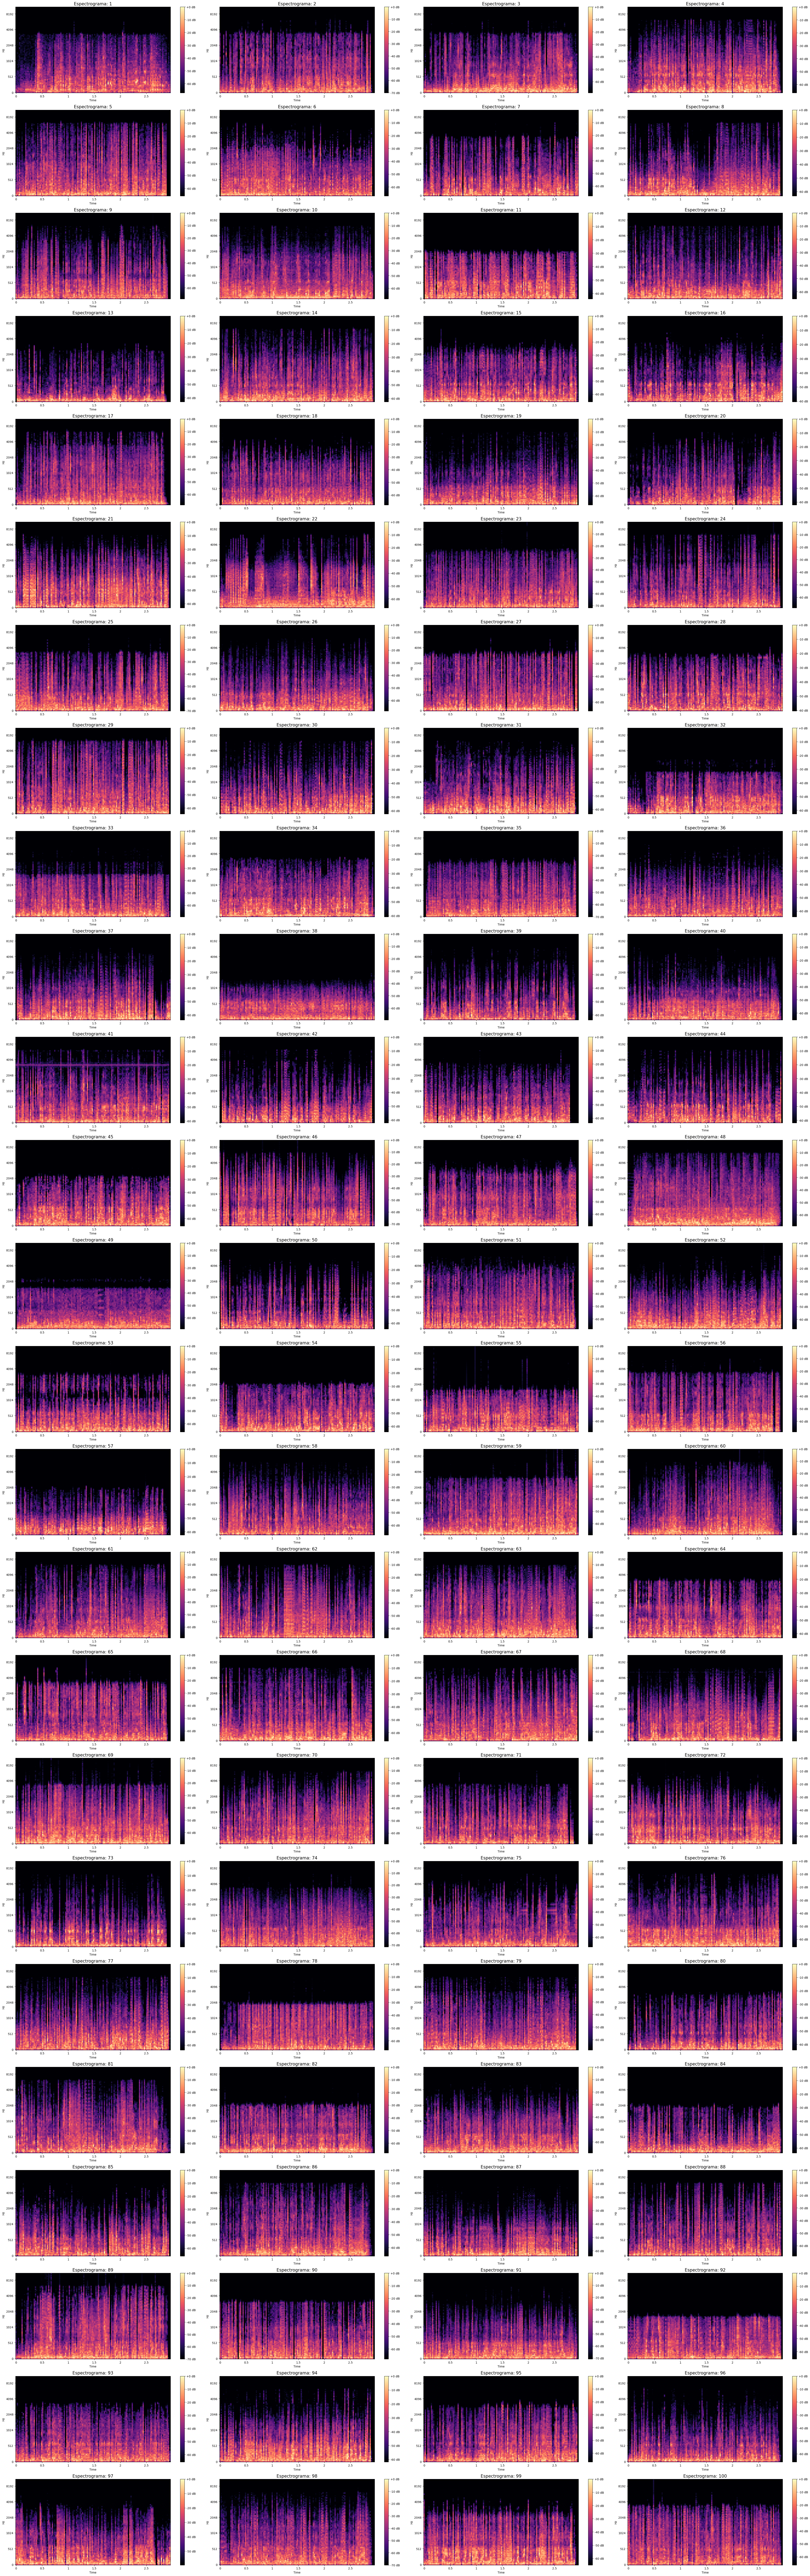

In [39]:
plt.figure(figsize=(40, 125))
for index, Sxx in enumerate(spectrograms):
    plt.subplot(25, 4, index + 1)
    librosa.display.specshow(librosa.power_to_db(Sxx.reshape(target_shape[0], target_shape[1]), ref=np.max), x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Espectrograma: {index + 1}', fontsize=15)

plt.tight_layout()
plt.show()

# Punto 1. (2.5/5.0) Agrupamiento (Clustering).

## Selección de caracterisiticas

El dataset está compuesto por espectrogramas de canciones. Para realizar un agrupamiento efectivo, se seleccionaron las características más importantes utilizando PCA, redujimos la dimensión de cada espectrograma desde las 16,384 dimensiones (matrices de 128x128) hasta un número manejable de dimensiones que preserven la mayor parte de la varianza en los datos.

Despues de analizar los resultados, observamos que 40 dimensiones son suficientes para capturar una buena representación de las características más relevantes.

In [4]:
spectrograms = np.load('spectrograms.npy')

[1.19346565e-01 5.04852862e-02 4.49017335e-02 3.82256904e-02
 3.55922178e-02 3.42628081e-02 3.22621573e-02 3.00724070e-02
 2.82225828e-02 2.73540350e-02 2.36292895e-02 2.07951317e-02
 2.05426805e-02 1.97420085e-02 1.79960401e-02 1.76869159e-02
 1.64730238e-02 1.62627556e-02 1.55697653e-02 1.48479518e-02
 1.43512739e-02 1.40198788e-02 1.33494544e-02 1.25757193e-02
 1.22088879e-02 1.18185438e-02 1.11979932e-02 1.08983190e-02
 1.06553392e-02 1.03082045e-02 9.76459845e-03 9.50656223e-03
 9.04493930e-03 8.87083322e-03 8.53922379e-03 8.32923996e-03
 8.14299181e-03 7.94540427e-03 7.56841946e-03 7.50061034e-03
 7.29870477e-03 7.12436364e-03 6.69966276e-03 6.52908801e-03
 6.42510716e-03 6.17420967e-03 6.05247787e-03 5.75411012e-03
 5.73092130e-03 5.33143782e-03 5.19572565e-03 5.11018473e-03
 4.85235413e-03 4.67028988e-03 4.63399226e-03 4.41233068e-03
 4.19700513e-03 4.02639406e-03 3.91399505e-03 3.68877296e-03
 3.68447081e-03 3.45187374e-03 3.44658647e-03 3.20284185e-03
 2.98716153e-03 2.911698

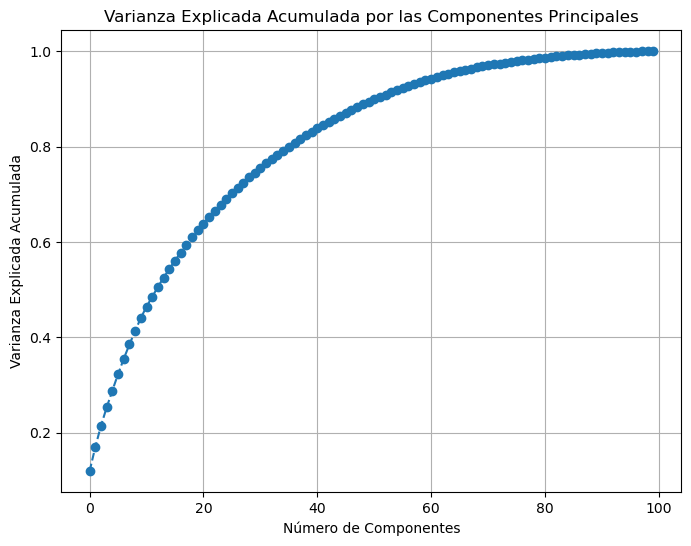

In [5]:
pca = PCA(n_components=100)
pca.fit(spectrograms)

explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por las Componentes Principales')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

## ¿Qué información se puede extraer de ese dataset que pueda ser aplicada en otros aspectos de la vida de la vida cotidiana (por ejemplo: estado emocional, salud, economía, etc.)?

La información que se puede estraer del datase para la vida cotidiana puede ser lo siguiente:

- <b>Estado emocional:</b> Las canciones pueden agruparse según patrones de frecuencias. Canciones con ritmos rápidos y altos niveles de energía podrían relacionarse con estados de ánimo activos o felices, en este caso puede funcionar, ya que por lo general la salsa (que fue el genero musical escogido), por lo general suele ser alegre.

- <b>Recomendaciones personalizadas:</b> Pueden ser usados en sistemas de recomendación, ya que se pueden identificar canciones similares en términos de estructura sonora, lo cual es muy útil en aplicaciones de streaming de música o para la creación de playlists automáticas (creo que es lo que se suele usar en spotify).

## ¿Qué técnicas de agrupamiento considera usted que se pueden aplicar a este dataset para entender los datos?

- <b>KMeans:</b> Dado que los espectrogramas tienen representaciones numéricas claras y relativamente homogéneas, KMeans es una técnica adecuada para este dataset. Este algoritmo permite agrupar los espectrogramas basados en distancias euclidianas entre los puntos en el espacio reducido de PCA.

- <b>DBSCAN:</b> También se podría aplicar DBSCAN en caso de que haya ruido en los datos, o si los clusters no son claramente esféricos. DBSCAN puede identificar patrones más complejos y manejar outliers de manera eficiente.

In [6]:
pca = PCA(n_components=40)
data_spectrograms = pca.fit_transform(spectrograms)

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_spectrograms)

c:\Users\Edilberto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
clusters

array([4, 1, 1, 1, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4,
       1, 4, 1, 4, 2, 4, 4, 4, 4, 4, 1, 4, 1, 4, 4, 0, 4, 4, 4, 4, 4, 4,
       4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4, 1,
       4, 4, 2, 3, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4,
       2, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4])

## Si es posible, muestre en un gráfico los clusters formados.

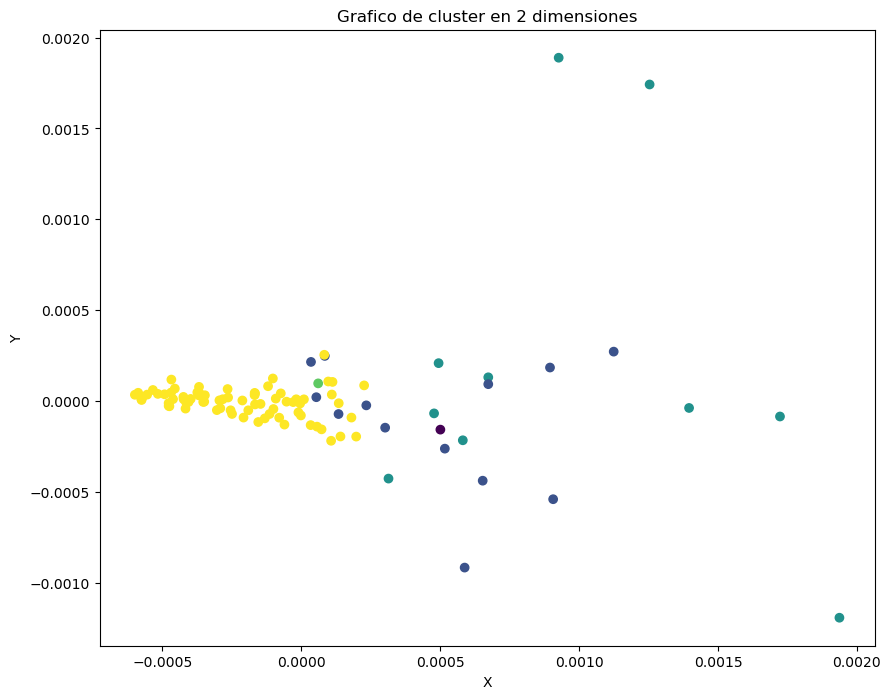

In [8]:
pca = PCA(n_components=2)
spectrograms_reduced = pca.fit_transform(data_spectrograms)

plt.figure(figsize=(10, 8))
plt.scatter(spectrograms_reduced[:, 0], spectrograms_reduced[:, 1], c=clusters, cmap='viridis')
plt.title('Grafico de cluster en 2 dimensiones')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Punto 2. (2.5/5.0) Reducción de dimensiones

## ¿Cuántas dimensiones (características, “features”, variables, etc.) identifica usted en este dataset?

El dataset original de espectrogramas tenia en matrices de 128x128, es decir, 16,384 dimensiones por espectrograma. Estas dimensiones representan la información en el dominio de las frecuencias y el tiempo. Sin embargo, para reducir la complejidad y facilitar el análisis, se aplicó PCA, lo cual se redujo dimensiones a 40, que es un espacio más manejable.

## ¿Cuál cree usted que es la mejor forma de mostrar la información del dataset?

Aunque se redujo el dataset a 40 dimensiones, para visualizarlo de manera clara y comprensible, se proyectaron los datos a 2 dimensiones utilizando las 2 primeras componentes principales. Esto permite un análisis más simple de los clusters formados.

Como anteriormente, ya se dibujaron las clusterings, ahora realizaremos un grafico de radar para las primeras 10 frecuencias de la matriz S para visualizar la densidad espectral de potencia de una señal en esas frecuencias específicas. Este gráfico es util, ya que nos permite comparar fácilmente cómo se distribuye la energía de la señal a través de diferentes frecuencias.

## Muestre de manera gráfica las características que usted considere más relevantes

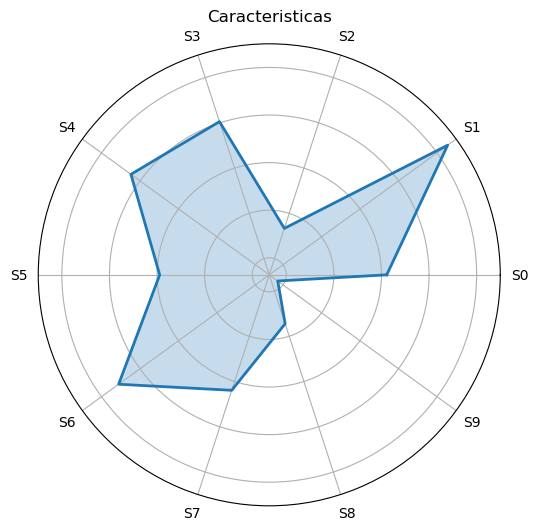

In [28]:
from sklearn.preprocessing import StandardScaler

def plot_radar_chart(data, labels, title):
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    data = np.concatenate((data,[data[0]]))
    angles += angles[:1]

    _, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    ax.fill(angles, data, alpha=0.25)
    ax.plot(angles, data, linewidth=2)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    plt.title(title)
    plt.show()

pca = PCA(n_components=10)
data_spectrograms_reduced = pca.fit_transform(data_spectrograms)

scaler = StandardScaler()
features = scaler.fit_transform(data_spectrograms_reduced)

mean_features = np.mean(features, axis=0)
labels = [f"S{i}" for i in range(len(mean_features))]

plot_radar_chart(mean_features, labels, f"Caracteristicas")

# Referencias

- “K-Means Clustering y PCA para clasificar la música por características de audio similares”. ICHI.PRO. Accedido el 12 de octubre de 2024. [En línea]. Disponible: https://ichi.pro/es/k-means-clustering-y-pca-para-clasificar-la-musica-por-caracteristicas-de-audio-similares-245233124019044
- S. Dua. “K-Means Clustering and PCA to categorize music by similar audio features”. Medium. Accedido el 12 de octubre de 2024. [En línea]. Disponible: https://towardsdatascience.com/k-means-clustering-and-pca-to-categorize-music-by-similar-audio-features-df09c93e8b64